### Importando bibliotecas 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Apenas para deixar a estética do notebook melhor, a bilbioteca `warnings` foi usada para ignorar os avisos que aparecem em vermelho embaixo das células. [1]

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Introdução

Devido à característica do dataframe utilizado de ser feito a partir de uma soma dos valores de algumas colunas para resultar na pegada de ecológica total, em tese há uma chance da regressão linear dar um resultado "perfeito" no qual ela consegue prever perfeitamente o target a partir dos atributos, resultando em um RMSE muito baixo. 
Para testar se de fato os dados possuem uma característica linear esperada o método utilizado foi a plotagem da média de cada uma das linhas do dataframe para o eixo x e a pegada ecológica para o eixo y. Da seguinte forma:

### Definindo o dataframe

In [3]:
dados = pd.read_csv("NFA 2017 Edition.csv")
dados = dados.dropna()
dados = dados.loc[dados["record"] == "BiocapTotGHA"]
dados

,index,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
3,3,Armenia,1992,1,BiocapTotGHA,9.538950e+05,4.653085e+05,2.892036e+05,4.727402e+04,199320.619674,0.0,1.955002e+06,5
15,15,Armenia,1993,1,BiocapTotGHA,9.241209e+05,4.657308e+05,2.897064e+05,4.724814e+04,184804.308265,0.0,1.911611e+06,5
27,27,Armenia,1994,1,BiocapTotGHA,8.905792e+05,4.729849e+05,2.898431e+05,4.716149e+04,171448.420103,0.0,1.872017e+06,5
39,39,Armenia,1995,1,BiocapTotGHA,8.884682e+05,5.052961e+05,2.895379e+05,4.702436e+04,169605.874864,0.0,1.899932e+06,5
51,51,Armenia,1996,1,BiocapTotGHA,9.522671e+05,5.382902e+05,2.899853e+05,4.696396e+04,174734.615574,0.0,2.002241e+06,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99303,99303,Timor-Leste,2013,176,BiocapTotGHA,2.013039e+05,6.847192e+04,5.722116e+05,1.060088e+06,42001.368091,0.0,1.944077e+06,3B
99315,99315,Trinidad and Tobago,2013,220,BiocapTotGHA,5.139011e+04,8.238753e+03,1.971365e+05,1.840749e+06,1395.143070,0.0,2.098910e+06,3B
99327,99327,Turkmenistan,2013,213,BiocapTotGHA,3.059010e+06,1.021329e+07,7.812751e+04,6.671880e+05,455806.313355,0.0,1.447342e+07,3B
99339,99339,Uruguay,2013,234,BiocapTotGHA,6.077915e+06,1.659146e+07,4.181995e+06,7.461952e+06,487608.960228,0.0,3.480094e+07,3B


### Fazendo a média dos atributos para plotar linearidade esperada [2]

In [4]:
dados_tratados = dados[["crop_land","grazing_land","forest_land","fishing_ground","built_up_land"]] # Referência [2]
dados_tratados['media_linhas'] = dados_tratados.mean(axis=1) 
dados_tratados

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,media_linhas
3,9.538950e+05,4.653085e+05,2.892036e+05,4.727402e+04,199320.619674,3.910004e+05
15,9.241209e+05,4.657308e+05,2.897064e+05,4.724814e+04,184804.308265,3.823221e+05
27,8.905792e+05,4.729849e+05,2.898431e+05,4.716149e+04,171448.420103,3.744034e+05
39,8.884682e+05,5.052961e+05,2.895379e+05,4.702436e+04,169605.874864,3.799865e+05
51,9.522671e+05,5.382902e+05,2.899853e+05,4.696396e+04,174734.615574,4.004482e+05
...,...,...,...,...,...,...
99303,2.013039e+05,6.847192e+04,5.722116e+05,1.060088e+06,42001.368091,3.888154e+05
99315,5.139011e+04,8.238753e+03,1.971365e+05,1.840749e+06,1395.143070,4.197819e+05
99327,3.059010e+06,1.021329e+07,7.812751e+04,6.671880e+05,455806.313355,2.894684e+06
99339,6.077915e+06,1.659146e+07,4.181995e+06,7.461952e+06,487608.960228,6.960187e+06


### Conferiado a linearidade

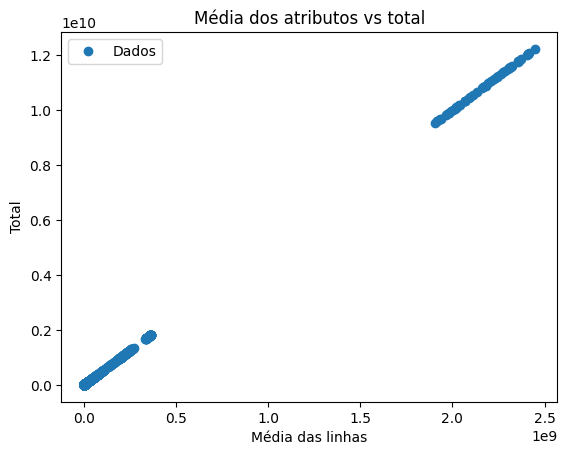

In [5]:
X = dados_tratados["media_linhas"]
Y = dados["total"]
    
figura, eixo = plt.subplots()
eixo.plot(X, Y, marker="o", linestyle="none", label = "Dados")

eixo.set_title(f"Média dos atributos vs total")
eixo.set_xlabel("Média das linhas")
eixo.set_ylabel("Total")
plt.legend()
plt.show()

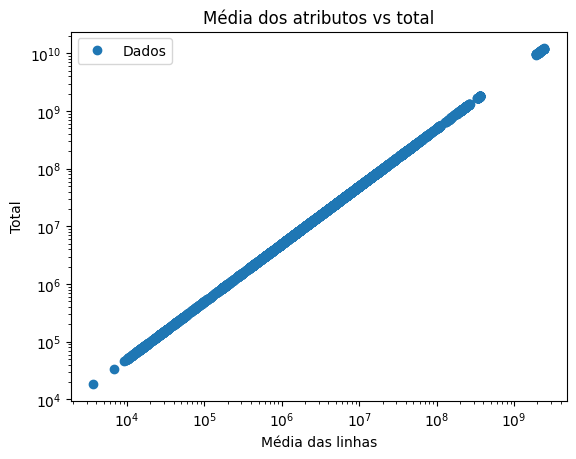

In [6]:
X = dados_tratados["media_linhas"]
Y = dados["total"]
    
figura, eixo = plt.subplots()
eixo.plot(X, Y, marker="o", linestyle="none", label = "Dados")

eixo.set_title(f"Média dos atributos vs total")
eixo.set_xlabel("Média das linhas")
eixo.set_ylabel("Total")
eixo.set_xscale("log")
eixo.set_yscale("log")
plt.legend()
plt.show()

Apesar dos gráficos apresentarem um intervalo nitidamente sem valores, a distribuição dos dados ocorre de forma linear, como esperado, devido a esse indicativo a regressão linear foi utilizada de forma a garantir um melhor entendimento do dataframe além da comparação de com método da floresta aleatória e testes em relação a quais atributos mais influenciam no resultado.

### Regressão linear

Para treinar o modelo a partir da regressão linear dois métodos foram utilizados, sem dividir os dados para treino e teste e dividindo eles. Inicialmente o teste foi feito considerando todos os atributos. 

### Definindo os atributos e o target 

In [7]:
atributos = [
    "crop_land",
    "grazing_land",
    "forest_land",
    "fishing_ground",
    "built_up_land"
]

target = "total"

### Treinando o modelo [3]

In [8]:
x = dados[atributos].values
y = dados[target].values

modelo = LinearRegression()
modelo.fit(x, y)

y_previsto = modelo.predict(x)

In [9]:
RMSE = mean_squared_error(y, y_previsto, squared=False)
print(f"O RMSE do modelo foi de {RMSE} unidades de y.")

O RMSE do modelo foi de 2.9402999254410256e-06 unidades de y.


Assim como esperado o RMSE foi extremamente baixo, indicando a altíssima precisão do modelo decorrente da linearidade dos dados. 

### Separando dados para treino e para teste [4]

In [10]:
porcentagem_teste = 0.15
semente_aleatória = 36

dados_treino, dados_teste = train_test_split(dados, test_size=porcentagem_teste, random_state=semente_aleatória)

In [11]:
dados_treino

,index,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
29403,29403,Haiti,1968,93,BiocapTotGHA,1.304615e+06,3.508582e+05,1.011245e+05,1.274397e+05,9.553810e+04,0.0,1.979576e+06,6
36279,36279,Kenya,1989,114,BiocapTotGHA,6.668325e+06,1.032396e+07,8.055164e+05,8.115319e+05,7.104554e+05,0.0,1.931978e+07,5
53211,53211,Poland,1969,173,BiocapTotGHA,3.240325e+07,2.856652e+06,2.856083e+07,4.238002e+06,1.926047e+06,0.0,6.998479e+07,6
50259,50259,Pakistan,2009,165,BiocapTotGHA,5.218347e+07,7.037238e+05,1.874710e+06,6.479021e+06,6.701259e+06,0.0,6.794218e+07,6
1539,1539,Algeria,1961,4,BiocapTotGHA,2.120314e+06,1.304619e+07,6.633845e+05,3.374062e+05,1.026126e+05,0.0,1.626991e+07,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15291,15291,Costa Rica,2004,48,BiocapTotGHA,1.649627e+06,1.514868e+06,2.830389e+06,5.770453e+05,4.011793e+05,0.0,6.973108e+06,5
35811,35811,Jordan,2003,112,BiocapTotGHA,4.425593e+05,1.250732e+05,1.866955e+05,2.057407e+04,2.983644e+05,0.0,1.073266e+06,6
11115,11115,Central African Republic,1974,37,BiocapTotGHA,7.962408e+05,2.497964e+06,3.235213e+07,0.000000e+00,4.267723e+04,0.0,3.568901e+07,6
7323,7323,Brazil,1976,21,BiocapTotGHA,6.094668e+07,1.728041e+08,1.412170e+09,3.496405e+07,4.720788e+06,0.0,1.685606e+09,6


In [12]:
dados_teste

,index,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
62559,62559,Somalia,2012,201,BiocapTotGHA,8.439537e+05,5.759081e+06,2.289062e+06,3.406963e+06,5.525921e+05,0.0,1.285165e+07,5
70359,70359,Uganda,1979,226,BiocapTotGHA,5.162897e+06,5.359344e+06,7.849691e+05,1.585552e+06,3.023773e+05,0.0,1.319514e+07,6
43227,43227,Mexico,1997,138,BiocapTotGHA,3.648525e+07,2.957600e+07,5.922874e+07,1.698156e+07,3.901410e+06,0.0,1.461730e+08,5
16755,16755,Czechoslovakia,1967,51,BiocapTotGHA,1.041481e+07,8.373282e+05,2.156867e+07,8.638142e+04,0.000000e+00,0.0,3.290719e+07,5
71151,71151,United Kingdom,1961,229,BiocapTotGHA,1.425042e+07,8.915154e+06,5.494361e+06,2.023355e+07,3.265955e+06,0.0,5.215944e+07,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,3819,Australia,1992,10,BiocapTotGHA,1.009026e+08,1.585691e+08,4.866862e+07,7.503530e+07,2.014268e+06,0.0,3.851899e+08,5
61731,61731,Singapore,1996,200,BiocapTotGHA,1.357433e+03,0.000000e+00,1.346008e+04,7.268821e+04,2.319061e+04,0.0,1.106963e+05,5
2499,2499,Angola,1988,7,BiocapTotGHA,9.820631e+05,2.992841e+07,1.388512e+07,5.469790e+06,1.235831e+05,0.0,5.038897e+07,6
4035,4035,Australia,2010,10,BiocapTotGHA,1.055399e+08,1.334704e+08,4.634410e+07,7.413127e+07,2.918889e+06,0.0,3.624046e+08,5


### Treinando o modelo com os dados de treino e teste

In [13]:
x_treino = dados_treino[atributos].values
y_treino = dados_treino[target].values.ravel()

x_teste = dados_teste[atributos].values
y_teste = dados_teste[target].values.ravel()

y_previsto_teste = modelo.predict(x_teste)

In [14]:
RMSE_teste = mean_squared_error(y_teste, y_previsto_teste, squared=False)
print(f"O RMSE do modelo nos dados de teste foi de {RMSE_teste} unidades de y.")

O RMSE do modelo nos dados de teste foi de 2.0045482651295525e-06 unidades de y.


Mesmo com os dados divididos em treino e teste a precisão do modelo continua alta.

### Atributos que mais influenciam

Por indicação do professor Daniel Cassar o modelo foi testado com o intuito de achar o quanto cada um dos atributos influencia no resultado. Para fazer isso foi feita uma função que testa cada um dos atributos.

### Definindo a função que testa os atributos

In [15]:
def testar_atributos(atributo):
 
    # Definindo atributos e target 
    target = "total"
    atributos = [
        "crop_land",
        "grazing_land",
        "forest_land",
        "fishing_ground",
        "built_up_land"
    ]
    atributos.remove(atributo)
        
    # Dividindo os dados em treino e teste
    porcentagem_teste = 0.1
    semente_aleatória = 36

    dados_treino, dados_teste = train_test_split(dados, test_size=porcentagem_teste, random_state=semente_aleatória)

    # Treinando modelo 
    x_treino = dados_treino[atributos].values
    y_treino = dados_treino[target].values.ravel()

    x_teste = dados_teste[atributos].values
    y_teste = dados_teste[target].values.ravel()
    
    modelo.fit(x_treino, y_treino)
    y_previsto_teste = modelo.predict(x_teste)
    
    # Computando o RMSE
    RMSE_teste = mean_squared_error(y_teste, y_previsto_teste, squared=False)
    print(f"O RMSE do modelo nos dados sem o atributo {atributo} foi de {RMSE_teste} unidades de y.")
    
    return RMSE_teste

### Testando os atributos

In [16]:
crop_land = testar_atributos("crop_land")
print()
grazing_land = testar_atributos("grazing_land")
print()
forest_land = testar_atributos("forest_land")
print()
fishing_ground = testar_atributos("fishing_ground")
print()
built_up_land = testar_atributos("built_up_land")

lista_atributos = [crop_land, grazing_land, forest_land, fishing_ground, built_up_land]
min(lista_atributos)

O RMSE do modelo nos dados sem o atributo crop_land foi de 35128094.38440476 unidades de y.

O RMSE do modelo nos dados sem o atributo grazing_land foi de 22946696.92602269 unidades de y.

O RMSE do modelo nos dados sem o atributo forest_land foi de 108469536.71445416 unidades de y.

O RMSE do modelo nos dados sem o atributo fishing_ground foi de 19742293.059221856 unidades de y.

O RMSE do modelo nos dados sem o atributo built_up_land foi de 5976695.216733769 unidades de y.


5976695.216733769

In [17]:
print("Média da área destinada a plantação")
print(dados_tratados["crop_land"].mean())
print()
print("Média da área destinada a pasto")
print(dados_tratados["grazing_land"].mean())
print()
print("Média da área destinada a florestas")
print(dados_tratados["forest_land"].mean())
print()
print("Média da área destinada a pesca")
print(dados_tratados["fishing_ground"].mean())
print()
print("Média da área destinada a construções")
print(dados_tratados["built_up_land"].mean())
print()
print("Média da pegada ecológica total")
print(dados["total"].mean())

Média da área destinada a plantação
41021113.373337574

Média da área destinada a pasto
22630401.20370833

Média da área destinada a florestas
82226970.43710598

Média da área destinada a pesca
17822803.274638332

Média da área destinada a construções
4097233.954755381

Média da pegada ecológica total
167798522.2435456


O atributo de área destinada a construções foi o que menos influenciou no resultado, com o modelo obtendo um RMSE de 5,9 milhões. Ainda sim esse RMSE é razoável devido à magnitude dos nossos dados. Essa diferença em relação à influência de cada atributo se deve ao fato do espaço destinado a contruções ser bem menor que os demais, inclusive o maior espaço, que é o destinado a florestas ocupa a posição do atributo que mais influencia. 

### Adições pós aula do dia 14/10

No dia 14/10 o professor Dr Daniel Roberto Cassar apresentou um mecanismo muito útil para testar o quanto os dados seguem uma distribuição linear, tal método é feito a partir das matrizes de covariância e de correlação. Tendo em vista a grande utilidade que essa variância pode ter para este estudo da linearidade dos dados do dataframe utilizado o professor permitiu que fosse feita uma atualização no trabalho, essa atualização será feita nesse notebook e na pasta **Gráficos** na qual haverá um gráfico extra mostrando o resultado da matriz de correlação.

### Matriz de correlação [5]

A matriz de covariância pode ser útil para apresentar a variação linear de duas variáveis, a utilidade dessa matriz nesse projeto diz respeito à melhora na interpretação do dataframe e no entendimento do porque o modelo de regressão linear obteve uma precisão tão alta. A matriz de correlação aplicada aos dados do dataframe utilizado é dada por: 

In [18]:
variaveis = [
    "crop_land",
    "grazing_land",
    "forest_land",
    "fishing_ground",
    "built_up_land",
    "total"
]

X = dados.reindex(variaveis, axis=1)
X = X.dropna()

matriz_covariancia = X.corr()

matriz_covariancia

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,total
crop_land,1.000000,0.948948,0.921386,0.941881,0.962304,0.966879
grazing_land,0.948948,1.000000,0.975951,0.975348,0.868325,0.989396
forest_land,0.921386,0.975951,1.000000,0.963196,0.827086,0.988928
fishing_ground,0.941881,0.975348,0.963196,1.000000,0.844626,0.979702
built_up_land,0.962304,0.868325,0.827086,0.844626,1.000000,0.889938
total,0.966879,0.989396,0.988928,0.979702,0.889938,1.000000


Já é possível perceber uma altíssima linearidade, todos os valores da matriz são maiores que 0.8, isso já da um idicativo da relação que existe entre os atributos. Para a melhor vizualização do resultado obtido, a representação visual dessa matriz é dada por:

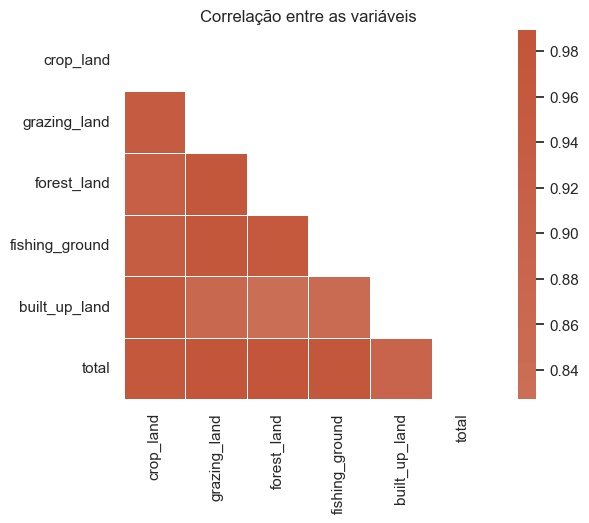

In [23]:
sns.set_theme(style="white")

m_corr = X.corr()
mascara = np.triu(np.ones_like(m_corr, dtype=bool))
mapa_de_cor = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    m_corr,
    mask=mascara,
    cmap=mapa_de_cor,
    center=0,
    square=True,
    linewidths=0.5,
);

plt.title("Correlação entre as variáveis")
plt.show()

Todas as correlações são muito altas como pode ser observado pelo gráfico mostrando que a relação linear muito alta se mantém em qualquer par de atributos ou o total em relação a cada um dos atributos.

### Conclusão

De fato os dados do dataframe se comportam de forma linear e por isso a regressão linear tem um resultado perfeito quando aplicada a eles, além disso, o teste de como cada um dos atributos influencia nos dados foi satisfatória pois demonstra que a influência que cada dado exerce no treinamento do modelo vai de acordo com o valor desse dado, quanto maior forem os valores mais eles influenciam. A comprovação da linearidade dos dados também foi útil para o entendimento do funcionamento tanto do dataframe quanto de como funciona o cálculo da pegada ecológica. O uso do conceito da matriz de correlação auxilia muito no entendimento da relação linear dos dados.

### Referências

[1] Biblioteca warnings: warnings — Warning control — Python 3.8.5 documentation. Disponível em: <https://docs.python.org/3/library/warnings.html>.

[2] Criar dataframe com colunas de outro dataframe: COMO. Como criar um dataframe copiando somente colunas escolhidas de outro dataframe? Disponível em: <https://pt.stackoverflow.com/questions/549800/como-criar-um-dataframe-copiando-somente-colunas-escolhidas-de-outro-dataframe>. Acesso em: 10 out. 2024.

Arquivos didáticos disponibilizado pelo professor Dr Daniel Roberto Cassar na matéria aprendizado de máquina:

[3] "ATP-203 3.0 - Modelo linear e baseline"

[4] "ATP-203 4.0 - Split de dados de treino e teste"

[5] "ATP-203 8.0 - A matrix de covariância e a matriz de correlação"